<a href="https://colab.research.google.com/github/a-charbel/Sizing_HPP_Assignment_2024/blob/main/sizing_exercise_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run these command the first time you open an instance of the Colab Notebook or when you restart it.

Comment them afterwards or avoid running the cell again.

In [3]:
# Clone the GitHub Repository in Colab so that we can access the data required to run the script
!git clone https://github.com/a-charbel/Sizing_HPP_Assignment_2024.git
%cd Sizing_HPP_Assignment_2024

# Instal required libraries
%pip install numpy_financial
%pip install pyomo
%pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge glpk

fatal: destination path 'Sizing_HPP_Assignment_2024' already exists and is not an empty directory.
/content/Sizing_HPP_Assignment_2024
✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



Import required libraries and functions

In [4]:
import pandas as pd
import numpy as np
from os.path import join
from datetime import datetime
from matplotlib import pyplot as plt
import sys, os

# Import necessary functions from the file sizing.py
from sizing import HPP, read_csv_Data

### 1- Data Analysis
In the folder Data, you will find 4 pairs of solar and wind data, each corresponding to a location within the same market region (hence the presence on only one price data). <br />
Location 1 is represented by the data files `aveS_1.csv` and `aveW_1.csv`. <br />
Throughout the assignment, you will size different power plants based on these locations. <br />
Let us first understand how the resource is varying in each location.

1.1- Classify each location in terms of low, medium, high solar and wind conditions. This is a relative comparison. <br />
Show how you reached your conclusion through plots or calculating relevant metrics.<br />

In [6]:
#Script and functions that can be used to answer question 1.1

# User inputs: (Within Question Notebook)

# Wind, Solar, Prices, data location
csv_file_index = 1 # change this index to change the file you are reading data from: only relevant for wind and solar data.
input_wind_ts_filename = './Data/aveW_%i.csv' %csv_file_index
input_solar_ts_filename = './Data/aveS_%i.csv' %csv_file_index
input_price_ts_filename = './Data/PriceProfilePPA.csv'

# Start and End date for the optimization
start_date = pd.to_datetime('2018-09-01 00:00')
end_date = pd.to_datetime("2019-08-31 23:00")

# Formating of data in the csv files
timeFormat_wind = "%d-%m-%Y %H:%M"
timeFormat_solar = "%d-%m-%Y %H:%M"
timeFormat_price = '%d/%m/%Y %H:%M'
timename = 'Time'
timeZone_wind = 'Asia/Kolkata'
timeZone_solar = 'Asia/Kolkata'
timeZone_price = 'Asia/Kolkata'
timeZone_analysis = 'Asia/Kolkata'

wind_power_t = read_csv_Data(
    input_wind_ts_filename,
    timename,
    timeFormat_wind,
    timeZone_wind,
    timeZone_analysis,
)
solar_power_t = read_csv_Data(
    input_solar_ts_filename,
    timename,
    timeFormat_solar,
    timeZone_solar,
    timeZone_analysis,
)

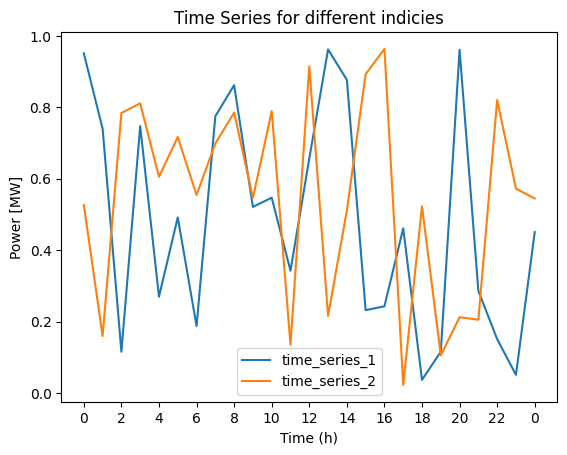

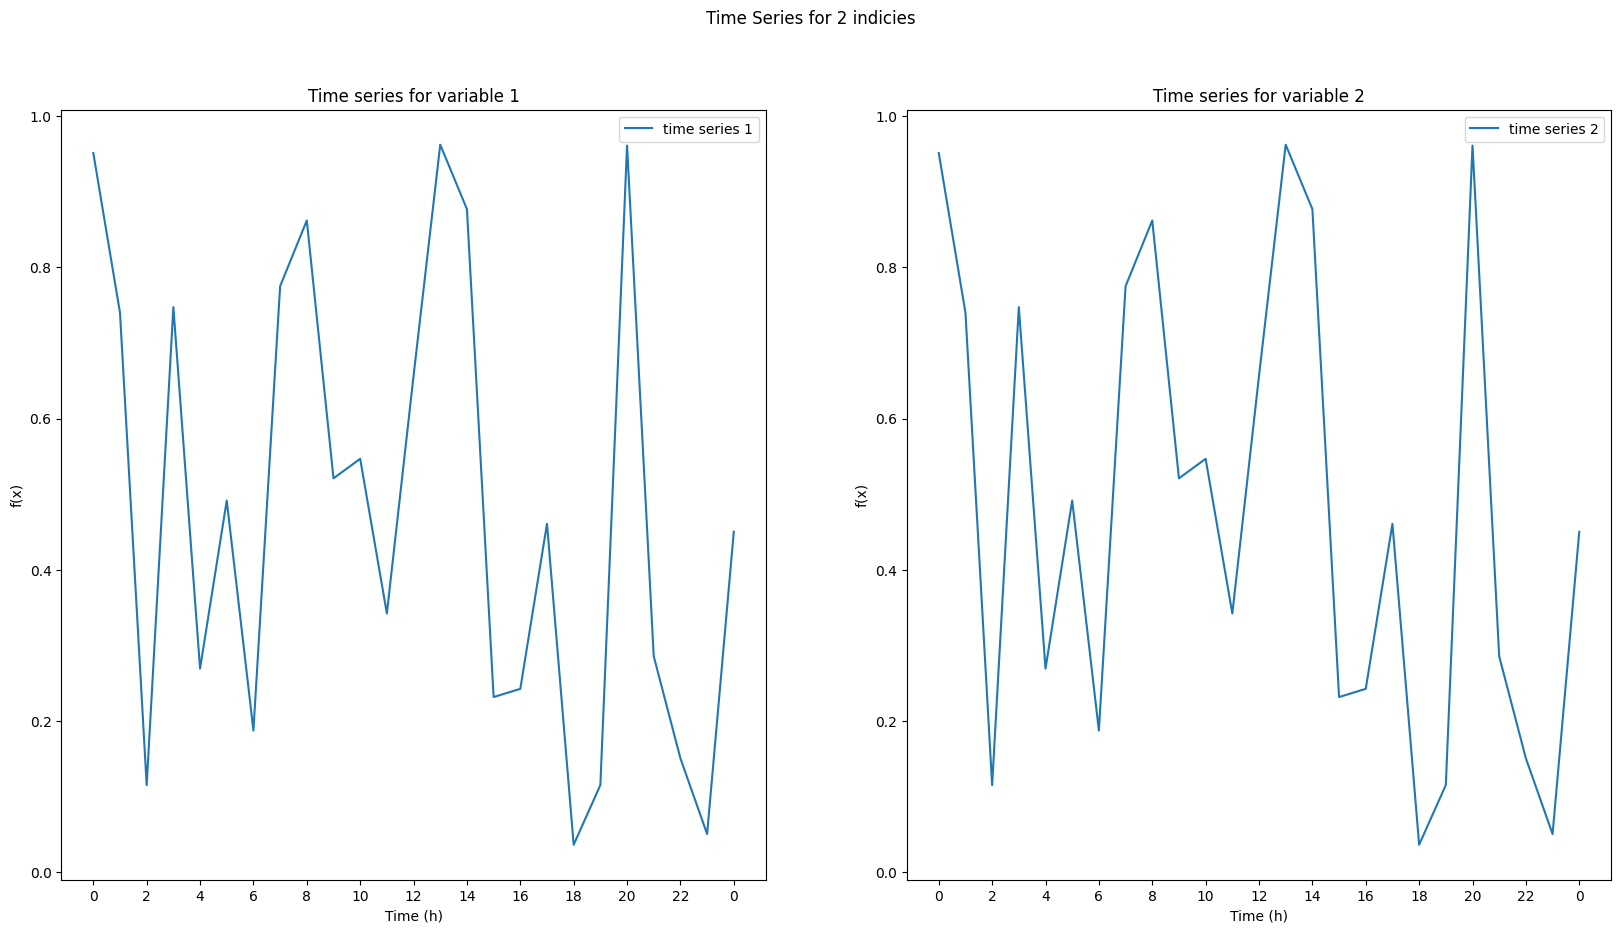

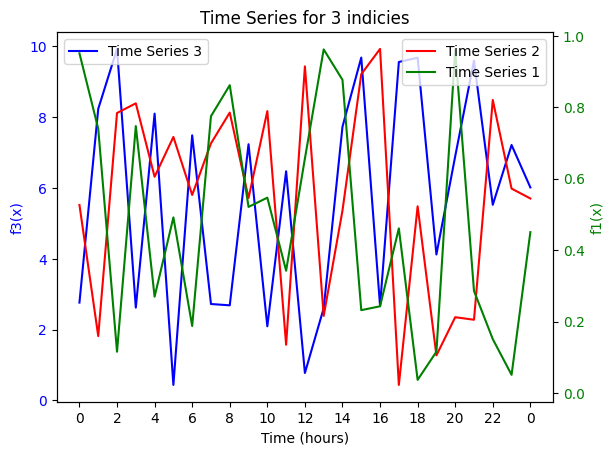

In [7]:
#Template for Plots and Subplots. Feel free to use them or use your own versions.
start_date_plot = datetime(2018,10,1)
end_date_plot = datetime(2018,10,2)
plot_date_range = pd.date_range(start_date_plot,end_date_plot,freq='H')
plot_date_range_xticks = pd.date_range(start_date_plot,end_date_plot,freq='2H')

time_series_1 = np.random.rand(len(plot_date_range))
time_series_2 = np.random.rand(len(plot_date_range))
time_series_3 = np.random.rand(len(plot_date_range))*10
#One Plot
plt.plot(plot_date_range, time_series_1, label="time_series_1")
plt.plot(plot_date_range, time_series_2, label="time_series_2")
plt.ylabel('Power [MW]')
plt.xlabel("Time (h)")
plt.title('Time Series for different indicies')
plt.xticks(ticks=plot_date_range_xticks, labels=np.array(list(range(0, 24, 2)) + [0]))
plt.legend()
plt.show()

#Several subplots
num_timeseries = 2
fig, axs = plt.subplots(1, num_timeseries, figsize=(20,10), sharex=True, sharey='col')
for index in range(num_timeseries):
    axs[index].plot(plot_date_range, time_series_1, label = "time series %i" %(index+1))

#Final formatting of subplot
axs[0].set_title('Time series for variable 1')
axs[1].set_title('Time series for variable 2')
for ii in range(2):
    axs[ii].set_ylabel("f(x)")
    axs[ii].set_xlabel("Time (h)")
    axs[ii].tick_params(axis="x", labelbottom=True)
    axs[ii].tick_params(axis="y", labelleft=True)
    axs[ii].legend()
plot_ticks_range = pd.date_range(datetime(2018,10,1),datetime(2018,10,2),freq='2H')
plt.xticks(ticks = plot_date_range_xticks, labels=np.array(list(range(0, 24, 2)) + [0]))

fig.suptitle("Time Series for %i indicies" %num_timeseries)

#One plot on 2 y-axis
num_timeseries = 3
fig, ax1 = plt.subplots()

# plot a time series on the first y-axis
ax1.plot(plot_date_range, time_series_3, color='blue')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('f3(x)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# create a second y-axis with the same x-axis
ax2 = ax1.twinx()

# plot the other time series on the second y-axis
ax2.plot(plot_date_range, time_series_2, color='red')
ax2.set_ylabel('f2(x)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# plot the third time series on the second y-axis
ax2.plot(plot_date_range, time_series_1, color='green')
ax2.set_ylabel('f1(x)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.xticks(ticks = plot_date_range_xticks, labels=np.array(list(range(0, 24, 2)) + [0]))

# set the title and legend
plt.title("Time Series for %i indicies" %num_timeseries)
#Manual legend if needed
ax1.legend(['Time Series 3'], loc='upper left')
ax2.legend(['Time Series 2', 'Time Series 1'], loc='upper right')

# plt.legend()
plt.show()

### 2- HPP sizing analysis for different locations
In this part of the assignment, we will study how the given locations affect the size of the HPP for a given configuration. <br /> <br />
2.1- Optimize the size of a HPP with the configuration Wind + Solar + Battery for each location. <br />
What is the optimized configuration for each location? <br />
Expectation: Results shown in a table.<br />
Hint: use the function `sizing_Wind_Solar_Battery_Pyomo` available within the object `HPP` defined in the script sizing.py. <br />


2.2 - Following the optimization, for each location, evaluate each HPP from the following perspectives:
- Energy production
- Profitability
- Grid connection utilization  <br />

Do the results match with the weather analysis in section 1.1? <br />
Expectation: show results in terms of tables or figures with: Evaluated metric vs. Location

2.3 - Analyze the power profile for location 3 and location 4.<br />
How different is the bidding strategy? <br />
Hint: Look at market prices and the power production of the HPP for the same time frame.<br />
Expectation: Plot(s), for a given day, justifying your answer.<br />

Below, you can find an example of how to use the required functions.  <br />

In [8]:
# User inputs:Have fun with the parameters
parameter_dict = {
    # hpp parameters
    'hpp_grid_connection': 300,  # in MW
    'hpp_land_area_available': 100,  # in square km
    'hpp_lifetime': 25,  # [years]
    'hpp_discount_factor': 0.07,
    'hpp_BOS_soft_cost': 119940,  # [Eur/MW]
    'hpp_grid_connection_cost': 37074,  # [Eur/MW]

    # hpp wind parameters
    'wind_rating_WT': 2.1,
    'wind_nWT_per_string': 20,
    'wind_lifetime_WT': 30,
    'wind_rotor_diameter': 97,  # in m
    'wind_hub_height': 120,  # in m
    'wind_turbine_spacing': 5,  # in terms of Rotor Diameter
    'wind_turbine_row_spacing': 10,  # in terms of Rotor Diameter
    'wind_turbine_cost': 851000,  # [EUR/MW]
    'wind_civil_works_cost': 116986,  # [Eur/MW]
    'wind_fixed_onm_cost': 12805,  # Wind fixed O&M cost per year [Eur/MW]

    # hpp solar parameters
    'solar_lifetime_PV': 30,
    'solar_PV_cost': 219000,  # [EUR/MW]
    'solar_hardware_installation_cost': 241854,  # [Eur/MW]
    'solar_fixed_onm_cost': 8149,  # Solar O&M cost per year [Eur/MW]

    # hpp battery parameters
    'battery_energy_cost': 181596,  # Eur/MWh
    'battery_power_cost': 64190,  # Power conversion system cost[Eur/MW]
    # Electric Balance of Plant, installation, commissioning cost [Eur/MW]
    'battery_BOP_installation_commissioning_cost': 73360,
    # Grid management control system cost[Eur/MW]
    'battery_control_system_cost': 18340,
    # Battery energy capacity maintenance cost [Eur/MWh] per year
    'battery_energy_onm_cost': 10000,
    'battery_depth_of_discharge': 0.9,
}


In [9]:
#For this assignement, do Not change the value of these paramenters, they are required arguments for the optimization. (Within Question Notebook)
simulation_dict = {
        'wind_as_component': 1,
        'solar_as_component': 1,
        'battery_as_component': 1,
}

In [10]:
# Create an object of type HPP that is define in the script sizing.py.
# This object contains all the sizing optimization functions and many other useful ones.

ExampleHPP = HPP(
        parameter_dict=parameter_dict,
        simulation_dict=simulation_dict,
)

In [11]:
# Script and functions that can be used to asnwer question 2.1
# User inputs: Wind, Solar, Prices, data location
csv_file_index = 1 # change this index to change the file you are reading data from: only relevant for wind and solar data.
input_wind_ts_filename = './Data/aveW_%i.csv' %csv_file_index
input_solar_ts_filename = './Data/aveS_%i.csv' %csv_file_index
input_price_ts_filename = './Data/PriceProfilePPA.csv'

# Start and End date for the optimization - Make sure to take 1 full year
start_date = pd.to_datetime('2018-09-01 00:00')
end_date = pd.to_datetime("2019-08-31 23:00")

# Formating of data in the csv files - Do not change, unless data format is changed
timeFormat_wind = "%d-%m-%Y %H:%M"
timeFormat_solar = "%d-%m-%Y %H:%M"
timeFormat_price = '%d/%m/%Y %H:%M'
timename = 'Time'
timeZone_wind = 'Asia/Kolkata'
timeZone_solar = 'Asia/Kolkata'
timeZone_price = 'Asia/Kolkata'
timeZone_analysis = 'Asia/Kolkata'

In [12]:
#Read the data from the files indicated in one of the above cells "User inputs"
wind_power_t = read_csv_Data(
    input_wind_ts_filename,
    timename,
    timeFormat_wind,
    timeZone_wind,
    timeZone_analysis,
)
solar_power_t = read_csv_Data(
    input_solar_ts_filename,
    timename,
    timeFormat_solar,
    timeZone_solar,
    timeZone_analysis,
)
spot_price_t = read_csv_Data(
    input_price_ts_filename,
    timename,
    timeFormat_price,
    timeZone_price,
    timeZone_analysis,
)

In [13]:
#Required data manipulation before optimization
wind_power_t = wind_power_t.loc[start_date:end_date, 'Pwind']
solar_power_t = solar_power_t.loc[start_date:end_date, 'Psolar']
spot_price_t = spot_price_t.loc[start_date:end_date, 'Price']

In [14]:
# %% --------------------------------------------------
# Optimize the sizing of HPP (wind, solar and battery)
# -----------------------------------------------------

[hpp_wind_capacity,
 hpp_solar_capacity,
 hpp_battery_power_rating,
 hpp_battery_energy_capacity,
 P_RES_available_t,
 P_HPP_t,
 P_curtailment_t,
 P_charge_discharge_t,
 E_SOC_t,
 hpp_investment_cost,
 hpp_maintenance_cost,
 LCOE,
 NPV,
 IRR] = ExampleHPP.sizing_Wind_Solar_Battery_Pyomo(wind_power_t,
                                             solar_power_t,
                                             spot_price_t)


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 85039009.6051698
  Upper bound: 85039009.6051698
  Number of objectives: 1
  Number of constraints: 52561
  Number of variables: 35045
  Number of nonzeros: 135621
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 9
      Number of created subproblems: 9
  Error rc: 0
  Time: 56.07560205459595
# ----------------------------------------------------------
#   Solution Information
# ----

In [15]:
# Additional scripts and functions that can be used to asnwer question 2.2.

# Calculate AEP in GWh and Curtailed Energy in MWh, using outputs of optimization


# Calculate Capacity factor:
# Example of CF based on Normalised Wind Power
wind_power_t = wind_power_t[start_date:end_date]
capacity_factor_wind = ExampleHPP.calculate_Capacity_Factor(wind_power_t, 1)

In [16]:
# Print relevant metrics if needed
print('Wind Capacity = %d MW' % hpp_wind_capacity)
print('Solar Capacity = %d MW' % hpp_solar_capacity)
print('Battery Storage Power Rating = %d MW' % hpp_battery_power_rating)
print(
    'Battery Storage Energy Rating = %d MWh' %
    hpp_battery_energy_capacity)
# print('AEP = %.0f GWh' % AEP)
# print('Curtailed Energy = %.0f GWh' % Curtailed_Energy)
# print('Capacity Factor of HPP = %.0f %' % HPP_CF)
print('HPP Investment Cost = %.0f MEUR' % (hpp_investment_cost / 1e6))
print('HPP Maintenance Cost = %.0f MEUR' %
      (hpp_maintenance_cost.sum() / 1e6))
print('HPP LCOE = %.2f EUR/MWh' % LCOE)
print('HPP NPV= %.0f MEUR' % (NPV / 1000000))
print('HPP IRR = %.0f%%' % (IRR * 100))

Wind Capacity = 168 MW
Solar Capacity = 380 MW
Battery Storage Power Rating = 83 MW
Battery Storage Energy Rating = 267 MWh
HPP Investment Cost = 476 MEUR
HPP Maintenance Cost = 198 MEUR
HPP LCOE = 38.44 EUR/MWh
HPP NPV= 85 MEUR
HPP IRR = 9%


### 3- The Value of HPP
In this section, we will demonstrate the value of HPPs as compared to individual technology power plants for a given location.<br />
Throughout this section, all answers must be based on the data of location 1 (e.g. `aveS_1.csv` and `avesW_1.csv`). <br />

3.1 - For the given `parameter_dict` and for Location 1, find the most profitable configuration that excludes batteries within the sizing optimization. <br />
From the results, identify which is the most prominent resource for this location (wind or solar).<br />
How does the operation of each configuration change?<br />
Which is the underlying phenomenon that drives the profitability of a Solar and Wind HPP? <br />
How can you quantify this phenomenon? <br />
Bonus: Calculate it. <br />
Hint for question 3.1 and 3.2: use the available functions in `sizing.py` to optimize a HPP for different configurations. <br />
Expectations: Present the optimal sizing and financial metrics for each configuration. <br />
Compare the operational behavior of each power plant for a given day. <br />

3.2 - For the same `parameter_dict` and for Location 1, find the most profitable configuration that includes batteries within the sizing optimization. <br />
When including batteries, which additional strategy does the optimization take advantage of, to optimize the size of the HPP? <br />
Hint for question 3.1 and 3.2: use the available functions in `sizing.py` to optimize a HPP for different configurations. <br />
Expectations: Present the optimal sizing and financial metrics for each configuration. <br />
Compare the operational behavior of each power plant for a given day. <br />

3.3 - How does hybridizing a power plant influence its operation? <br />
Expectation: compare the operational behavior of different configurations for a given day.<br />

In [17]:
#You are expected to use the following as a starting point for this section. This should not be changed.

#Get data from Location 1
csv_file_index = 1

#locate file with given index
input_wind_ts_filename = './Data/aveW_%i.csv' %csv_file_index
input_solar_ts_filename = './Data/aveS_%i.csv' %csv_file_index
input_price_ts_filename = './Data/PriceProfilePPA.csv'
# Start and End date for the optimization
start_date = pd.to_datetime('2018-09-01 00:00')
end_date = pd.to_datetime("2019-08-31 23:00")

# Formating of data in the csv files
timeFormat_wind = "%d-%m-%Y %H:%M"
timeFormat_solar = "%d-%m-%Y %H:%M"
timeFormat_price = '%d/%m/%Y %H:%M'
timename = 'Time'
timeZone_wind = 'Asia/Kolkata'
timeZone_solar = 'Asia/Kolkata'
timeZone_price = 'Asia/Kolkata'
timeZone_analysis = 'Asia/Kolkata'

#read file with given index
wind_power_t = read_csv_Data(
input_wind_ts_filename,
timename,
timeFormat_wind,
timeZone_wind,
timeZone_analysis,
)
solar_power_t = read_csv_Data(
input_solar_ts_filename,
timename,
timeFormat_solar,
timeZone_solar,
timeZone_analysis,
)

spot_price_t = read_csv_Data(
input_price_ts_filename,
timename,
timeFormat_price,
timeZone_price,
timeZone_analysis,
)

wind_power_t = wind_power_t.loc[start_date:end_date, 'Pwind']
solar_power_t = solar_power_t.loc[start_date:end_date, 'Psolar']
spot_price_t = spot_price_t.loc[start_date:end_date, 'Price']

### 4- Impact of HPP uncertainties
Every power plant is subject to uncertainties during the design phase, this aspect must be considered when designing a HPP.
However, with the current framework, technical and financial uncertainties aren't considered. This requires the implementation of a more sophisticated optimization framework.
Nonetheless, we can study the impact of uncertainty on a given configuration by conducting a sensitivity analysis.

4.1 - Which, in your opinion, are the most impactful and uncertain inputs within this sizing optimization framework.
Hint: Look at the `parameter_dict`<br />
Expectation: a listing of 3-5 parameters and why you are expecting them to be impactful.

4.2 - Conduct a sensitivity analysis on a HPP composed of Solar, Wind, and Batteries. <br />
Are the results compatible with your expectations (answer to question 4.1)?<br />
To answer this question: <br />
- Use the uncertain parameters identified previously.
- For each parameter, run the optimization using an upper and lower value. <br /> For example, run `sizing_Wind_Solar_Battery_Pyomo` with metric_1 x 1.3 and with metric_1 x 0.85.  <br /> metric_1 being the uncertain input that you have identified.  <br /> The values 1.3 and 0.85 are only examples, you have to find reasonable values for each uncertain input.

Hint: Tornado diagrams are an effective tool to show how sensitive a metric is with regard to several uncertain inputs.
Expectation: Figure(s) showing sensitivity analysis and discussion on results.